## PCA example

Shows the four most common features of faces and prints the minimal allowed distance
for new faces.

took 39.66940379142761 seconds to read data
base took 1.0888347625732422 seconds to build
Max distance 128.44274505528472
Mean Distance 21.938996904010644
time to train 22.035339832305908
Success rate: 1.0


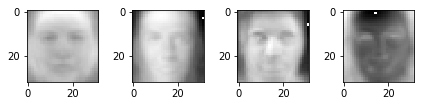

In [2]:
from eigenfaces import Eigenclassifier
from utilities import data
from utilities import image
from utilities.test import test
from time import time

pre_fetch = time()

(bdata, trdata, tedata) = data.get_data()

print("took {} seconds to read data"
      .format(time() - pre_fetch))



classifier = Eigenclassifier(base_dim=5, orthogonalize=True)
classifier.build_base(bdata)
classifier.train(bdata, trdata)

success_frequency, _ = test(classifier, tedata)
print("Success rate: {}".format(success_frequency))

classifier.show_principal_component()


## Examples of Classification.

The test_data does not contain annotations, it does however appear to be the case that all tests are faces.
It is assumed that all tests are faces and anything not classified as a face is a missclassification.

I encourage to try to switch around different variables and see what happends, play around with orthogonalization
and different space dimensionalities and use different data sets for building the minimal_distance. 

took 39.60731387138367 seconds to read data
base took 0.979557991027832 seconds to build
Max distance 88.00433315650771
Mean Distance 2.916316456881776
time to train 21.817909955978394
Success rate: 0.496
took 0.00032711029052734375 seconds to slide through all windows for size 40
took 1.7941548824310303 seconds to classify the windows


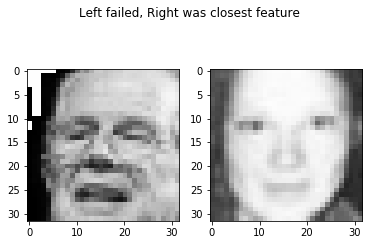

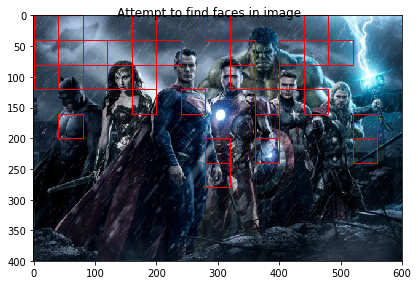

In [3]:
from eigenfaces import Eigenclassifier
from utilities import data
from utilities import image as imtool
from utilities.test import test
from time import time
from matplotlib import pyplot as plt
from sliding_window import Window, classify_windows, slide



pre_fetch = time()

(bdata, trdata, tedata) = data.get_data()

print("took {} seconds to read data"
       .format(time() - pre_fetch))

classifier = Eigenclassifier(base_dim=2)
classifier.build_base(bdata)
mean_value, _, _ = classifier.train(bdata, trdata)

# Change the value for the maximum allowed to change strictness of the classifier
# Default is the minimal value possible to classify every training face as a face
# But there might be outliers.. so changing it might help
classifier.maximal_allowed_distance = mean_value

success_rate, (fail, closest) = test(classifier, tedata)
print("Success rate: {}".format(success_rate))

if not fail is None:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle("Left failed, Right was closest feature")
    ax1.imshow(imtool.vector_to_image(fail, (32, 32)))
    ax2.imshow(imtool.vector_to_image(closest, (32, 32)))
        

classifiable, original = imtool.get_classifiable_image("/Users/jonval/WARNING/singularity/MLHub/Eigenfaceinator/avengers.jpg")
fig2, (ax3) = plt.subplots(1, 1)
ax3.imshow(original)

WINDOW_SIZE = 40

pre_slide = time()
windows = slide(classifiable, (WINDOW_SIZE, WINDOW_SIZE), stride=40)
print("took {} seconds to slide through all windows for size {}"
      .format(time() - pre_slide, WINDOW_SIZE))

pre_classification = time()
positives, negatives = classify_windows(classifier, windows)
print("took {} seconds to classify the windows"
      .format(time() - pre_classification))

for window in positives:
    window.add_rectangle_to_image(ax3)

fig2.suptitle("Attempt to find faces in image")

plt.tight_layout()
plt.show()


The results kind of speak for themselves, this method is not very good for finding faces in images :) 